<a href="https://colab.research.google.com/github/bigmikeee/my-notebooks-2022-summer-nyu/blob/main/Dealing_with_Data_Baseball_Project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Cleaning

In [ ]:
import pandas as pd
#data from April 1, 2021 - October 3, 2021
df1= pd.read_csv("savant_data.csv")
df2= pd.read_csv("savant_data (1).csv")
df3= pd.read_csv("savant_data (2).csv")
df4= pd.read_csv("savant_data (3).csv")
df5= pd.read_csv("savant_data (4).csv")
df6= pd.read_csv("savant_data (5).csv")
df7= pd.read_csv("savant_data (6).csv")
df8= pd.read_csv("savant_data (7).csv")
df9= pd.read_csv("savant_data (8).csv")
df10= pd.read_csv("savant_data (9).csv")
df11= pd.read_csv("savant_data (10).csv")
df12= pd.read_csv("savant_data (11).csv")
df13= pd.read_csv("savant_data (12).csv")
df14= pd.read_csv("savant_data (13).csv")
df15= pd.read_csv("savant_data (14).csv")
df16= pd.read_csv("savant_data (15).csv")
df17= pd.read_csv("savant_data (16).csv")
df18= pd.read_csv("savant_data (17).csv")
df19= pd.read_csv("savant_data (18).csv")
df20= pd.read_csv("savant_data (19).csv")
df21= pd.read_csv("savant_data (20).csv")
df22= pd.read_csv("savant_data (21).csv")
df23= pd.read_csv("savant_data (22).csv")
df24= pd.read_csv("savant_data (23).csv")
df25= pd.read_csv("savant_data (24).csv")
df26= pd.read_csv("savant_data (25).csv")
#concatenate all of the mini df's into one big df
mydata = df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26], ignore_index=True)

In [ ]:
#block of code to convert pitch types into just "fastballs" or "offspeed"
pitch_type_series = mydata["pitch_type"]
pitch_type_list = pitch_type_series.tolist()
for i in range(len(pitch_type_list)):
  if pitch_type_list[i] == "FF" or pitch_type_list[i]=="SI" or pitch_type_list=="FT":
    pitch_type_list[i] = "fastball"
  else: pitch_type_list[i] = "offspeed"

#update the dataframe with this new pitch_type_list
mydata["type_of_pitch"] = pitch_type_list

In [ ]:
#block of code to convert player names from "Judge, Aaron" to "Aaron Judge"
mydata["firstname"] = mydata.player_name.str.extract(r'\b(\w+)$',expand = True)  #using "regular expressions"
mydata["lastname"] = mydata.player_name.str.extract(r'\b(\w+)*', expand=True)   #using "regular expressions"
mydata["playername"] = mydata["firstname"] + " " + mydata["lastname"]

In [ ]:
#If the "event" is something weird like a force_out,grounded_into_double_play, field_error, double_play, fielders_choice,
#(cont'd) fielders_choice_out, sac_fly_double_play,triple_play,catcher_interference, sac_bunt_double_play 
#(cont'd) then change the "event" to "field out"
mydata.loc[mydata["events"] == "force_out", "events"] = "field_out"
mydata.loc[mydata["events"] == "grounded_into_double_play", "events"] = "field_out"
mydata.loc[mydata["events"] == "field_error", "events"] = "field_out"
mydata.loc[mydata["events"] == "double_play", "events"] = "field_out"
mydata.loc[mydata["events"] == "fielders_choice", "events"] = "field_out"
mydata.loc[mydata["events"] == "fielders_choice_out", "events"] = "field_out"
mydata.loc[mydata["events"] == "sac_fly_double_play", "events"] = "field_out"
mydata.loc[mydata["events"] == "triple_play", "events"] = "field_out"
mydata.loc[mydata["events"] == "catcher_interf", "events"] = "field_out"
mydata.loc[mydata["events"] == "sac_bunt_double_play", "events"] = "field_out"
mydata.loc[mydata["events"] == "sac_fly", "events"] = "field_out"
mydata.loc[mydata["events"] == "sac_bunt", "events"] = "field_out"

In [ ]:
mydata.loc[mydata["zone"] == 1.0, "zone"] = "high and left"
mydata.loc[mydata["zone"] == 2.0, "zone"] = "high and middle"
mydata.loc[mydata["zone"] == 3.0, "zone"] = "high and right"
mydata.loc[mydata["zone"] == 4.0, "zone"] = "middle and left"
mydata.loc[mydata["zone"] == 5.0, "zone"] = "down the middle"
mydata.loc[mydata["zone"] == 6.0, "zone"] = "middle and right"
mydata.loc[mydata["zone"] == 7.0, "zone"] = "low and left"
mydata.loc[mydata["zone"] == 8.0, "zone"] = "low and middle"
mydata.loc[mydata["zone"] == 9.0, "zone"] = "low and right"
mydata.loc[mydata["zone"] == 11.0, "zone"] = "high and left (ball)"
mydata.loc[mydata["zone"] == 12.0, "zone"] = "high and right (ball)"
mydata.loc[mydata["zone"] == 13.0, "zone"] = "low and left (ball)"
mydata.loc[mydata["zone"] == 14.0, "zone"] = "low and right (ball)"

In [ ]:
#narrow down our dataframe into the columns that we're maybe gonna use
columns_used = ["type_of_pitch", "playername","events","description","zone","stand","p_throws","bat_score","fld_score"]
ourdata = mydata[columns_used]
#ourdata.head(3)  #view the first 3 rows

In [ ]:
#narrow down our dataframe to one where it's only balls hit into play (across all of MLB, all of 2021)
balls_in_play = ourdata["description"] == "hit_into_play"
our_df = ourdata[balls_in_play]
#our_df.head(3) #view the first 3 rows

In [ ]:
#dataframe where its only fastballs hit into play (across all of MLB, all of 2021)
fastballs = our_df["type_of_pitch"] == "fastball"
MLB_fastball_df = our_df[fastballs]
#MLB_fastball_df.head(3)  #view the first 3 rows

In [ ]:
#dataframe where its only offspeed hit into play (across all of MLB, all of 2021) 
offspeed = our_df["type_of_pitch"] == "offspeed"
MLB_offspeed_df = our_df[offspeed]
#MLB_offspeed_df.head(3) #view the first 3 rows

##Calculate League-Wide Statistics

In [ ]:
league_fieldout_fb = (MLB_fastball_df["events"].values=='field_out').sum()
league_single_fb = (MLB_fastball_df["events"].values=='single').sum()
league_double_fb = (MLB_fastball_df["events"].values=='double').sum()
league_triple_fb = (MLB_fastball_df["events"].values=='triple').sum()
league_homerun_fb = (MLB_fastball_df["events"].values=='home_run').sum()
league_all_fb = (MLB_fastball_df["events"].values!='').sum()

In [ ]:
league_fieldout_percentage_fb = league_fieldout_fb / league_all_fb
league_single_percentage_fb = league_single_fb / league_all_fb
league_double_percentage_fb = league_double_fb / league_all_fb
league_triple_percentage_fb = league_triple_fb / league_all_fb
league_homerun_percentage_fb = league_homerun_fb / league_all_fb

In [ ]:
league_fieldout_offspeed = (MLB_offspeed_df["events"].values=='field_out').sum()
league_single_offspeed = (MLB_offspeed_df["events"].values=='single').sum()
league_double_offspeed = (MLB_offspeed_df["events"].values=='double').sum()
league_triple_offspeed = (MLB_offspeed_df["events"].values=='triple').sum()
league_homerun_offspeed = (MLB_offspeed_df["events"].values=='home_run').sum()
league_all_offspeed = (MLB_offspeed_df["events"].values!='').sum()

In [ ]:
league_fieldout_percentage_offspeed = league_fieldout_offspeed / league_all_offspeed
league_single_percentage_offspeed = league_single_offspeed / league_all_offspeed
league_double_percentage_offspeed = league_double_offspeed / league_all_offspeed
league_triple_percentage_offspeed = league_triple_offspeed / league_all_offspeed
league_homerun_percentage_offspeed = league_homerun_offspeed / league_all_offspeed

##Scouting Report

In [ ]:
def scouting_report(name, pitcher_handedness):
  print("This is the scouting report for " + name, end=".\n\n")

  if pitcher_handedness == "R":
    throws = "against right-handed pitchers"
  elif pitcher_handedness == "L":
    throws = "against left-handed pitchers"
  
  print("Here is some relevant information about how " + name + " fares " + throws, end=".\n\n")
  
  #First, obtain the player's individual date frame
  player = mydata["playername"] == name
  player_df = mydata[player]
  player_df = player_df[player_df["p_throws"] == pitcher_handedness]

  player_bip = player_df["description"] == "hit_into_play"  ##bip stands for ball in play
  player_bip_df = player_df[player_bip]

  player_fastballs = player_bip_df["type_of_pitch"] == "fastball"
  player_fastballs_df = player_bip_df[player_fastballs]

  player_offspeed = player_bip_df["type_of_pitch"] == "offspeed"
  player_offspeed_df = player_bip_df[player_offspeed]

  #Next, calculate the player's individual statistics
  player_fieldout_fb = (player_fastballs_df["events"].values=='field_out').sum()
  player_single_fb = (player_fastballs_df["events"].values=='single').sum()
  player_double_fb = (player_fastballs_df["events"].values=='double').sum()
  player_triple_fb = (player_fastballs_df["events"].values=='triple').sum()
  player_homerun_fb = (player_fastballs_df["events"].values=='home_run').sum()
  player_all_fb = (player_fastballs_df["events"].values!='').sum()

  player_fieldout_percentage_fb = player_fieldout_fb / player_all_fb
  player_single_percentage_fb = player_single_fb / player_all_fb
  player_double_percentage_fb = player_double_fb / player_all_fb
  player_triple_percentage_fb = player_triple_fb / player_all_fb
  player_homerun_percentage_fb = player_homerun_fb / player_all_fb

  player_fieldout_offspeed = (player_offspeed_df["events"].values=='field_out').sum()
  player_single_offspeed = (player_offspeed_df["events"].values=='single').sum()
  player_double_offspeed = (player_offspeed_df["events"].values=='double').sum()
  player_triple_offspeed = (player_offspeed_df["events"].values=='triple').sum()
  player_homerun_offspeed = (player_offspeed_df["events"].values=='home_run').sum()
  player_all_offspeed = (player_offspeed_df["events"].values!='').sum()

  player_fieldout_percentage_offspeed = player_fieldout_offspeed / player_all_offspeed
  player_single_percentage_offspeed = player_single_offspeed / player_all_offspeed
  player_double_percentage_offspeed = player_double_offspeed / player_all_offspeed
  player_triple_percentage_offspeed = player_triple_offspeed / player_all_offspeed
  player_homerun_percentage_offspeed = player_homerun_offspeed / player_all_offspeed



  #Finally, print out the comparisons between a player's individual statistics and the league-wide statistics
  if abs(player_single_percentage_fb - league_single_percentage_fb) > 0.03:
    print(name, "hits fastballs for singles", throws, format(player_single_percentage_fb,".0%"), "of the time, while the league hits them", format(league_single_percentage_fb,".0%"), "of the time")
  if abs(player_double_percentage_fb - league_double_percentage_fb) > 0.03:
    print(name, "hits fastballs for doubles", throws, format(player_double_percentage_fb,".0%"), "of the time, while the league hits them", format(league_double_percentage_fb,".0%"), "of the time")
  if abs(player_triple_percentage_fb - league_triple_percentage_fb) > 0.03:
    print(name, "hits fastballs for triples", throws, format(player_triple_percentage_fb,".0%"), "of the time, while the league hits them", format(league_triple_percentage_fb,".0%"), "of the time")
  if abs(player_homerun_percentage_fb - league_homerun_percentage_fb) > 0.03:
    print(name, "hits fastballs for home runs", throws, format(player_homerun_percentage_fb,".0%"), "of the time, while the league hits them", format(league_homerun_percentage_fb,".0%"), "of the time")
  if abs(player_fieldout_percentage_fb - league_fieldout_percentage_fb) > 0.03:
    print(name, "hits fastballs for outs", throws, format(player_fieldout_percentage_fb,".0%"), "of the time, while the league hits them", format(league_fieldout_percentage_fb,".0%"), "of the time")
  print("")
  if abs(player_single_percentage_offspeed - league_single_percentage_offspeed) > 0.03:
    print(name, "hits offspeed pitches for singles", throws, format(player_single_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_single_percentage_offspeed,".0%"), "of the time")
  if abs(player_double_percentage_offspeed - league_double_percentage_offspeed) > 0.03:
    print(name, "hits offspeed pitches for doubles", throws, format(player_double_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_double_percentage_offspeed,".0%"), "of the time")
  if abs(player_triple_percentage_offspeed - league_triple_percentage_offspeed) > 0.03:
    print(name, "hits offspeed pitches for triples", throws, format(player_triple_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_triple_percentage_offspeed,".0%"), "of the time")
  if abs(player_homerun_percentage_offspeed - league_homerun_percentage_offspeed) > 0.03:
    print(name, "hits offspeed pitches for home runs", throws, format(player_homerun_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_homerun_percentage_offspeed,".0%"), "of the time")
  if abs(player_fieldout_percentage_offspeed - league_fieldout_percentage_offspeed) > 0.03:
    print(name, "hits offspeed pitches for outs", throws, format(player_fieldout_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_fieldout_percentage_offspeed,".0%"), "of the time")
  print("")

##Pie Charts

In [ ]:
def charts_fastball(name, pitcher_handedness):
  player = mydata["playername"] == name
  player_df = mydata[player]
  player_df = player_df[player_df["p_throws"] == pitcher_handedness]

  player_bip = player_df["description"] == "hit_into_play"  ##bip stands for ball in play
  player_bip_df = player_df[player_bip]

  player_fastballs = player_bip_df["type_of_pitch"] == "fastball"
  player_fastballs_df = player_bip_df[player_fastballs]

#pie charts:
  player_fastballs_events_df = player_fastballs_df["events"].value_counts() #renamed the dataframe
  player_fastballs_events_df.plot(x=[[0]], y=[[1]], kind ="pie",autopct='%1.1f%%',title="Player's Results on Fastballs Hit into Play")

In [ ]:
def charts_offspeed(name, pitcher_handedness):
  player = mydata["playername"] == name
  player_df = mydata[player]
  player_df = player_df[player_df["p_throws"] == pitcher_handedness]

  player_bip = player_df["description"] == "hit_into_play"  ##bip stands for ball in play
  player_bip_df = player_df[player_bip]

  player_offspeed = player_bip_df["type_of_pitch"] == "offspeed"
  player_offspeed_df = player_bip_df[player_offspeed]
#pie charts:
  player_offspeed_events_df = player_offspeed_df["events"].value_counts()
  player_offspeed_events_df.plot(x=[[0]], y=[[1]], kind ="pie",autopct='%1.1f%%', title="Player's Results on Offspeed Pitches Hit into Play")

##Heat Maps

In [ ]:
#Fastball Heatmap for Individual Player

import seaborn as sns
import matplotlib.pyplot as plt

def heat_map_fastball(name, pitcher_handedness):
  graph_columns_fastball = ["playername","events","zone","p_throws","type_of_pitch"] #Narrow data down to columns we will use for graph
  graph_df_fastball = our_df[graph_columns_fastball] #Set new dataframe with only the three categories above
  graph_df_fastball = graph_df_fastball[graph_df_fastball['playername'] == name]
  graph_df_fastball = graph_df_fastball[graph_df_fastball['p_throws'] == pitcher_handedness]
  graph_df_fastball = graph_df_fastball[graph_df_fastball["type_of_pitch"] == "fastball"]

  graph_df_fastball.groupby('events').zone.value_counts() #Group events and categorize by zone

  zone_events_fastball = (graph_df_fastball #Set variable for heatmap and create grid format
    .groupby('events')
    .zone
    .value_counts()
    .unstack()
    .fillna(0)
    )

  fig, ax = plt.subplots()
  plt.title("Player Heatmap: Fastballs")
  ax.set_ylim(1, 5)
  sns.heatmap(zone_events_fastball, cmap="Blues") 

In [ ]:
#Offspeed Heatmap for Individual Player

def heat_map_offspeed(name, pitcher_handedness):
  graph_columns_df_offspeed = ["playername","events","zone","p_throws","type_of_pitch"] #Narrow data down to columns we will use for graph
  graph_df_offspeed = our_df[graph_columns_df_offspeed] #Set new dataframe with only the three categories above
  graph_df_offspeed = graph_df_offspeed[graph_df_offspeed['playername'] == name]
  graph_df_offspeed = graph_df_offspeed[graph_df_offspeed["type_of_pitch"] == "offspeed"]
  graph_df_offspeed = graph_df_offspeed[graph_df_offspeed['p_throws'] == pitcher_handedness]

  graph_df_offspeed.groupby('events').zone.value_counts() #Group events and categorize by zone

  zone_events_offspeed = (graph_df_offspeed #Set variable for heatmap and create grid format
   .groupby('events')
   .zone
   .value_counts()
   .unstack()
   .fillna(0)
   )

  fig, ax = plt.subplots()
  plt.title("Player Heatmap: Offspeed")
  ax.set_ylim(1, 5)
  sns.heatmap(zone_events_offspeed, cmap="Blues")

##Final Product

In [ ]:
def baseball_analysis(name, pitcher_handedness):
  scouting_report(name, pitcher_handedness)
  charts_fastball(name, pitcher_handedness)
  heat_map_fastball(name, pitcher_handedness)

Who do you want a scouting report of? Giancarlo Stanton
Is the opposing pitcher a righty or a lefty? Enter 'R' or 'L': L
This is the scouting report for Giancarlo Stanton.

Here is some relevant information about how Giancarlo Stanton fares against left-handed pitchers.

Giancarlo Stanton hits fastballs for doubles against left-handed pitchers 2% of the time, while the league hits them 6% of the time
Giancarlo Stanton hits fastballs for home runs against left-handed pitchers 16% of the time, while the league hits them 5% of the time
Giancarlo Stanton hits fastballs for outs against left-handed pitchers 60% of the time, while the league hits them 66% of the time

Giancarlo Stanton hits offspeed pitches for singles against left-handed pitchers 27% of the time, while the league hits them 20% of the time
Giancarlo Stanton hits offspeed pitches for doubles against left-handed pitchers 3% of the time, while the league hits them 6% of the time
Giancarlo Stanton hits offspeed pitches for outs 

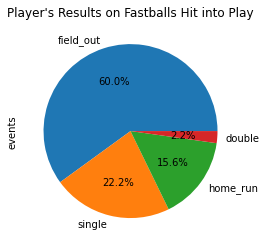

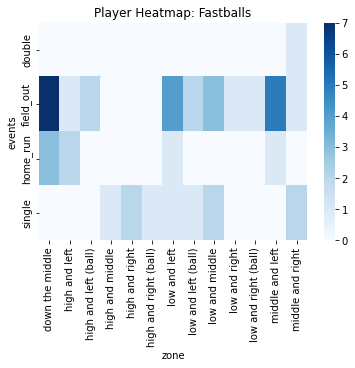

In [ ]:
pick_a_player = input("Who do you want a scouting report of? ")
pitcher_handedness = input("Is the opposing pitcher a righty or a lefty? Enter 'R' or 'L': ")
baseball_analysis(pick_a_player, pitcher_handedness)

Would you like to see offspeed data for Giancarlo Stanton? Input yes or no: yes


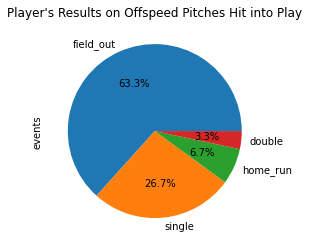

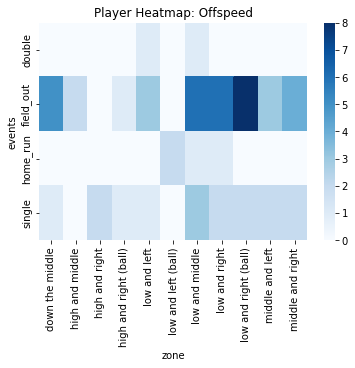

In [ ]:
answer_to_question = input("Would you like to see offspeed data for " + pick_a_player + "? Input yes or no: ")
if answer_to_question.lower() == "yes":
  charts_offspeed(pick_a_player, pitcher_handedness)
  heat_map_offspeed(pick_a_player, pitcher_handedness)

##Future Ideas

In [ ]:
#### FUTURE 
#block of code to convert player names from "Judge, Aaron" to "Aaron Judge"
mydata["firstname"] = mydata.player_name.str.extract(r'\b(\w+)$',expand = True)  #using "regular expressions"
mydata["lastname"] = mydata.player_name.str.extract(r'\b(\w+)*', expand=True)   #using "regular expressions"
mydata["playername"] = mydata["firstname"] + " " + mydata["lastname"]


###Thomas 
mydata["pitcher_hand"] = mydata["p_throws"]

In [ ]:
###Thomas continued


fastball_field_out_l = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'field_out', 'p_throws'].value_counts()['L'].sum()
fastball_field_out_r = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'field_out', 'p_throws'].value_counts()['R'].sum()

fastball_single_l = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'single', 'p_throws'].value_counts()['L'].sum()
fastball_single_r = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'single', 'p_throws'].value_counts()['R'].sum()

fastball_double_l = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'double', 'p_throws'].value_counts()['L'].sum()
fastball_double_r = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'double', 'p_throws'].value_counts()['R'].sum()

fastball_triple_l = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'triple', 'p_throws'].value_counts()['L'].sum()
fastball_triple_r = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'triple', 'p_throws'].value_counts()['R'].sum()

fastball_home_run_l = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'home_run', 'p_throws'].value_counts()['L'].sum()
fastball_home_run_r = MLB_fastball_df.loc[MLB_fastball_df['events'] == 'home_run', 'p_throws'].value_counts()['R'].sum()



league_all_fb_l = MLB_fastball_df.loc[MLB_fastball_df['events'] != '', 'p_throws'].value_counts()['L'].sum()
league_all_fb_r = MLB_fastball_df.loc[MLB_fastball_df['events'] != '', 'p_throws'].value_counts()['R'].sum()




In [ ]:
###thomas continued

league_fieldout_percentage_fb_l = fastball_field_out_l / league_all_fb_l
league_fieldout_percentage_fb_r = fastball_field_out_r / league_all_fb_r
print(league_fieldout_percentage_fb_l)
print(league_fieldout_percentage_fb_r)

league_single_percentage_fb_l = fastball_single_l / league_all_fb_l
league_single_percentage_fb_r = fastball_single_r / league_all_fb_r
print(league_single_percentage_fb_l)
print(league_single_percentage_fb_r)

league_double_percentage_fb_l = fastball_double_l / league_all_fb_l
league_double_percentage_fb_r = fastball_double_r / league_all_fb_r
print(league_double_percentage_fb_l)
print(league_double_percentage_fb_r)

league_triple_percentage_fb_l = fastball_triple_l / league_all_fb_l
league_triple_percentage_fb_r = fastball_triple_r / league_all_fb_r
print("")
print(league_triple_percentage_fb_l)
print(league_triple_percentage_fb_r)

league_home_run_percentage_fb_l = fastball_home_run_l / league_all_fb_l
league_home_run_percentage_fb_r = fastball_home_run_r / league_all_fb_r
print(league_home_run_percentage_fb_l)
print(league_home_run_percentage_fb_r)

print("")
print("all league left hand: " + str(league_all_fb_l))
print("all league left hand home run: " + str(fastball_home_run_l))
print("all league: " + str(league_all_fb))

0.6626564523090203
0.6653432815387774
0.2186016400517911
0.21126246377803637
0.06279671989641779
0.06573573368015151

0.005233059991368148
0.00590959910557419
0.05071212775140268
0.05174892189746047

all league left hand: 18536
all league left hand home run: 940
all league: 62363


In [ ]:
### Thomas
def scouting_report(name):
  print("This is the scouting report for " + name, end=".\n")
  player = mydata["playername"] == name
  player_df = mydata[player]

  player_bip = player_df["description"] == "hit_into_play"  ##bip stands for ball in play
  player_bip_df = player_df[player_bip]

  player_fastballs = player_bip_df["type_of_pitch"] == "fastball"
  player_fastballs_df = player_bip_df[player_fastballs]

  player_offspeed = player_bip_df["type_of_pitch"] == "offspeed"
  player_offspeed_df = player_bip_df[player_offspeed]



  player_fieldout_fb = (player_fastballs_df["events"].values=='field_out').sum()
  player_single_fb = (player_fastballs_df["events"].values=='single').sum()
  player_double_fb = (player_fastballs_df["events"].values=='double').sum()
  player_triple_fb = (player_fastballs_df["events"].values=='triple').sum()
  player_homerun_fb = (player_fastballs_df["events"].values=='home_run').sum()
  player_all_fb = (player_fastballs_df["events"].values!='').sum()


  ###Thomas
  ### try to pull events that fulfill the request. If it does not work, do the exept --> convert to 0

  
  try: player_all_fb_l = player_fastballs_df.loc[player_fastballs_df['events'] != '', 'p_throws'].value_counts()['L'].sum() 
  except: player_all_fb_l = 0
  try: player_all_fb_r = player_fastballs_df.loc[player_fastballs_df['events'] != '', 'p_throws'].value_counts()['R'].sum() 
  except: player_all_fb_r = 0

  player_fieldout_percentage_fb = player_fieldout_fb / player_all_fb
  player_single_percentage_fb = player_single_fb / player_all_fb
  player_double_percentage_fb = player_double_fb / player_all_fb
  player_triple_percentage_fb = player_triple_fb / player_all_fb
  player_homerun_percentage_fb = player_homerun_fb / player_all_fb



  try: player_fb_fieldout_l = player_fastballs_df.loc[player_fastballs_df['events'] == 'field_out', 'p_throws'].value_counts()['L'].sum() 
  except: player_fb_fieldout_l = 0
  try: player_fb_fieldout_r = player_fastballs_df.loc[player_fastballs_df['events'] == 'field_out', 'p_throws'].value_counts()['R'].sum()
  except: player_fb_fieldout_r = 0
  try: player_fb_single_l = player_fastballs_df.loc[player_fastballs_df['events'] == 'single', 'p_throws'].value_counts()['L'].sum()
  except: player_fb_single_l = 0
  try: player_fb_single_r = player_fastballs_df.loc[player_fastballs_df['events'] == 'single', 'p_throws'].value_counts()['R'].sum()
  except: player_fb_single_r = 0
  try: player_fb_double_l = player_fastballs_df.loc[player_fastballs_df['events'] == 'double', 'p_throws'].value_counts()['L'].sum()
  except: player_fb_double_l = 0
  try: player_fb_double_r = player_fastballs_df.loc[player_fastballs_df['events'] == 'double', 'p_throws'].value_counts()['R'].sum()
  except: player_fb_double_r = 0
  try: player_fb_triple_l = player_fastballs_df.loc[player_fastballs_df['events'] == 'triple', 'p_throws'].value_counts()['L'].sum()
  except: player_fb_triple_l = 0
  try: player_fb_triple_r = player_fastballs_df.loc[player_fastballs_df['events'] == 'triple', 'p_throws'].value_counts()['R'].sum()
  except: player_fb_triple_r = 0
  try: player_fb_home_run_l = player_fastballs_df.loc[player_fastballs_df['events'] == 'field_out', 'p_throws'].value_counts()['L'].sum()
  except: player_fb_home_run_l = 0
  try: player_fb_home_run_r = player_fastballs_df.loc[player_fastballs_df['events'] == 'field_out', 'p_throws'].value_counts()['R'].sum()
  except: player_fb_home_run_r = 0


  player_fieldout_offspeed = (player_offspeed_df["events"].values=='field_out').sum()
  player_single_offspeed = (player_offspeed_df["events"].values=='single').sum()
  player_double_offspeed = (player_offspeed_df["events"].values=='double').sum()
  player_triple_offspeed = (player_offspeed_df["events"].values=='triple').sum()
  player_homerun_offspeed = (player_offspeed_df["events"].values=='home_run').sum()
  player_all_offspeed = (player_offspeed_df["events"].values!='').sum()

  try: player_all_of_l = player_offspeed_df.loc[player_offspeed_df['events'] != '', 'p_throws'].value_counts()['L'].sum() 
  except: player_all_of_l = 0
  try: player_all_of_r = player_offspeed_df.loc[player_offspeed_df['events'] != '', 'p_throws'].value_counts()['R'].sum() 
  except: player_all_of_r = 0

  player_fieldout_percentage_offspeed = player_fieldout_offspeed / player_all_offspeed
  player_single_percentage_offspeed = player_single_offspeed / player_all_offspeed
  player_double_percentage_offspeed = player_double_offspeed / player_all_offspeed
  player_triple_percentage_offspeed = player_triple_offspeed / player_all_offspeed
  player_homerun_percentage_offspeed = player_homerun_offspeed / player_all_offspeed


  try: player_of_fieldout_l = player_offspeed_df.loc[player_offspeed_df['events'] == 'field_out', 'p_throws'].value_counts()['L'].sum() 
  except: player_of_fieldout_l = 0
  try: player_of_fieldout_r = player_offspeed_df.loc[player_offspeed_df['events'] == 'field_out', 'p_throws'].value_counts()['R'].sum()
  except: player_of_fieldout_r = 0
  try: player_of_single_l = player_offspeed_df.loc[player_offspeed_df['events'] == 'single', 'p_throws'].value_counts()['L'].sum()
  except: player_of_single_l = 0
  try: player_of_single_r = player_offspeed_df.loc[player_offspeed_df['events'] == 'single', 'p_throws'].value_counts()['R'].sum()
  except: player_of_single_r = 0
  try: player_of_double_l = player_offspeed_df.loc[player_offspeed_df['events'] == 'double', 'p_throws'].value_counts()['L'].sum()
  except: player_of_double_l = 0
  try: player_of_double_r = player_offspeed_df.loc[player_offspeed_df['events'] == 'double', 'p_throws'].value_counts()['R'].sum()
  except: player_of_double_r = 0
  try: player_of_triple_l = player_offspeed_df.loc[player_offspeed_df['events'] == 'triple', 'p_throws'].value_counts()['L'].sum()
  except: player_of_triple_l = 0
  try: player_of_triple_r = player_offspeed_df.loc[player_offspeed_df['events'] == 'triple', 'p_throws'].value_counts()['R'].sum()
  except: player_of_triple_r = 0
  try: player_of_home_run_l = player_offspeed_df.loc[player_offspeed_df['events'] == 'home_run', 'p_throws'].value_counts()['L'].sum()
  except: player_of_home_run_l = 0
  try: player_of_home_run_r = player_offspeed_df.loc[player_offspeed_df['events'] == 'home_run', 'p_throws'].value_counts()['R'].sum()
  except: player_of_home_run_r = 0



# ###
#   print(name, "hits fastballs for singles", format(player_single_percentage_fb,".0%"), "of the time, while the league hits them", format(league_single_percentage_fb,".0%"), "of the time")
#   print(name, "hits fastballs for doubles", format(player_double_percentage_fb,".0%"), "of the time, while the league hits them", format(league_double_percentage_fb,".0%"), "of the time")
#   print(name, "hits fastballs for triples", format(player_triple_percentage_fb,".0%"), "of the time, while the league hits them", format(league_triple_percentage_fb,".0%"), "of the time")
#   print(name, "hits fastballs for home runs", format(player_homerun_percentage_fb,".0%"), "of the time, while the league hits them", format(league_homerun_percentage_fb,".0%"), "of the time")
#   print(name, "hits fastballs for outs", format(player_fieldout_percentage_fb,".0%"), "of the time, while the league hits them", format(league_fieldout_percentage_fb,".0%"), "of the time")
#   print("")
#   print(name, "hits offspeed pitches for singles", format(player_single_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_single_percentage_offspeed,".0%"), "of the time")
#   print(name, "hits offspeed pitches for doubles", format(player_double_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_double_percentage_offspeed,".0%"), "of the time")
#   print(name, "hits offspeed pitches for triples", format(player_triple_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_triple_percentage_offspeed,".0%"), "of the time")
#   print(name, "hits offspeed pitches for home runs", format(player_homerun_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_homerun_percentage_offspeed,".0%"), "of the time")
#   print(name, "hits offspeed pitches for outs", format(player_fieldout_percentage_offspeed,".0%"), "of the time, while the league hits them", format(league_fieldout_percentage_offspeed,".0%"), "of the time")
# ### 

  
  print(name, "hits fastballs for singles", format(player_fb_single_l / player_all_fb_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_single_percentage_fb_l, ".0%"), "of the time")
  print(name, "hits fastballs for singles", format(player_fb_single_r / player_all_fb_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_single_percentage_fb_r, ".0%"), "of the time")
  print(name, "hits fastballs for doubles", format(player_fb_double_l / player_all_fb_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_double_percentage_fb_l, ".0%"), "of the time")
  print(name, "hits fastballs for doubles", format(player_fb_double_r / player_all_fb_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_double_percentage_fb_r, ".0%"), "of the time")
  print(name, "hits fastballs for triples", format(player_fb_triple_l / player_all_fb_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_triple_percentage_fb_l, ".0%"), "of the time")
  print(name, "hits fastballs for triples", format(player_fb_triple_r / player_all_fb_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_triple_percentage_fb_r, ".0%"), "of the time")
  print(name, "hits fastballs for home runs", format(player_fb_home_run_l / player_all_fb_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_home_run_percentage_fb_l, ".0%"), "of the time")
  print(name, "hits fastballs for home runs", format(player_fb_home_run_r / player_all_fb_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_home_run_percentage_fb_r, ".0%"), "of the time")
  print(name, "hits fastballs for outs", format(player_fb_fieldout_l / player_all_fb_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_fieldout_percentage_fb_l, ".0%"), "of the time")
  print(name, "hits fastballs for outs", format(player_fb_fieldout_r / player_all_fb_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_fieldout_percentage_fb_r, ".0%"), "of the time")
  

  print("")
  print(name, "hits offspeed for singles", format(player_of_single_l / player_all_of_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_single_percentage_of_l, ".0%"), "of the time")
  print(name, "hits offspeed for singles", format(player_of_single_r / player_all_of_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_single_percentage_of_r, ".0%"), "of the time")
  print(name, "hits offspeed for doubles", format(player_of_double_l / player_all_of_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_double_percentage_of_l, ".0%"), "of the time")
  print(name, "hits offspeed for doubles", format(player_of_double_r / player_all_of_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_double_percentage_of_r, ".0%"), "of the time")
  print(name, "hits offspeed for triples", format(player_of_triple_l / player_all_of_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_triple_percentage_of_l, ".0%"), "of the time")
  print(name, "hits offspeed for triples", format(player_of_triple_r / player_all_of_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_triple_percentage_of_r, ".0%"), "of the time")
  print(name, "hits offspeed for home runs", format(player_of_home_run_l / player_all_of_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_home_run_percentage_of_l, ".0%"), "of the time")
  print(name, "hits offspeed for home runs", format(player_of_home_run_r / player_all_of_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_home_run_percentage_of_r, ".0%"), "of the time")
  print(name, "hits offspeed for outs", format(player_of_fieldout_l / player_all_of_l, ".0%"), "of the time against left hand pitchers, while the league hits them", format(league_fieldout_percentage_of_l, ".0%"), "of the time")
  print(name, "hits offspeed for outs", format(player_of_fieldout_r / player_all_of_r, ".0%"), "of the time against right hand pitchers, while the league hits them", format(league_fieldout_percentage_of_r, ".0%"), "of the time")
  
  
